# Assignment- 1 
## Investment case study for Spark Funds

In [399]:
#importing the libraries
import pandas as pd
import numpy as np

Reading the files in the datafarme, while reading faced many issues due to encoding, but finally got the below combination working.

In [400]:
companies = pd.read_csv('companies.txt', sep = '\t', encoding = 'ISO-8859-1')
rounds = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')

# Checkpoint 1: Data Cleaning 

In [401]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [402]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


permalink column from companies datafram & company_permalink column from rounds df can be used to merge the dataframes, but there is difference of upper & lower case characters that needs to be corrected, also need to verify that the data is similar in both the data frames.

In [403]:
print(len(rounds.company_permalink.unique()))
print('----------')
print(len(companies.permalink.unique()))

90247
----------
66368


Data in rounds file company_permalink coloumn dataframe seems more, lets correct the cases & observe

In [404]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [405]:
#Check the length again, post changing perminlink in lower as whole in both the df
print(len(rounds.company_permalink.unique()))
print('----------')
print(len(companies.permalink.unique()))

66370
----------
66368


The difference is reduced significantly,but seems that we have 2 companies more in companies permalink, lets check the difference

In [406]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [407]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink'])]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
16827,/organization/e-cãbica,E CÃBICA,NaN,NaN,operating,NaN,NaN,NaN,NaN,NaN
18197,/organization/energystone-games-çµçÿ³æ¸¸æ,EnergyStone Games çµç³æ¸¸æ,NaN,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,06-01-2013
26139,/organization/huizuche-com-æ ç§è½¦,Huizuche.com æ ç§è½¦,http://huizuche.com,NaN,closed,NaN,NaN,NaN,NaN,24-04-2014
58344,/organization/tipcat-interactive-æ²èä¿¡æ¯ç...,TipCat Interactive æ²èä¿¡æ¯ç§æ,http://www.tipcat.com,Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,18-08-2009
65778,/organization/zengame-ç¦ æ¸¸ç§æ,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010


Seems, some characters are abnormal characters, checked in the actual file,  data is correct there, got some hints in the webnair to try encoding & decoding, got details from stackflow

In [408]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [409]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink'])]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


looks fine now! Checking the unique data in companies file (permalink column) & round file (company_permalink)

In [410]:
#chekcing unique values again
print(len(rounds.company_permalink.unique()))
print('----------')
print(len(companies.permalink.unique()))

66368
----------
66368


In [411]:
#applying the same logic as above in companies dataframe
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [412]:
# checking for companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


So, counts are equal!
Permalink & company_permalink can be used to merge the dataframes

In [413]:
#Saving the clean data
rounds.to_csv('rounds_clean.csv', sep= ',', index = False)
companies.to_csv('companies_clean.csv', sep = '\t', index = False)

## Missing Values check

In [414]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [492]:
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

The values, companies.permalink & rounds.company_permalink don't have any NULL values, will treat the others later

In [416]:
master = pd.merge(companies, rounds, how = 'inner', left_on='permalink', right_on = 'company_permalink')
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [417]:
master.shape

(114949, 16)

In [418]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [419]:
# removing permalink, as its the same as company_permalink
master = master.drop(['permalink'], axis =1)
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [420]:
# checking null values.
master.isnull().sum()

name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [421]:
#percentage values
round((100*(master.isnull().sum()/len(master.index))),2)

name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

homepage_url,State_code, region, city, founded_at has missing values & these coloums are irrelevant as per the business requirement, so dropping the same. Also funding_round_code, has a lot of missing values so dropping this coloum as well.

In [422]:
#dropping cols
master = master.drop(['homepage_url', 'state_code', 'region', 'city', 'founded_at','funding_round_code'], axis = 1)

In [423]:
master.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [424]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 9 columns):
name                       114948 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(8)
memory usage: 8.8+ MB


In [425]:
#checking the missing values again
round((100*(master.isnull().sum()/len(master.index))),2)

name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

NULL values are still seen, in category_list, country_code & raised_amount_usd, all these coloums are required for our business analysis, can't be deleted as whole without analysis

Checking the measures of central tendency for amount raised_amount_usd

In [426]:
master.raised_amount_usd.describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [427]:
master.raised_amount_usd.mean()

10426869.33450226

In [428]:
master.raised_amount_usd.median()

1680511.0

In [429]:
master.raised_amount_usd.min()

0.0

In [430]:
master.raised_amount_usd.max()

21271935000.0

It seems that data is very wide spread by max & min values, the mean is around 10M, whereas the Median is around 1M, since the difference is huge, imputation would skew up the analysis. Hence, deciding to drop the rows.

In [431]:
#chekcing NUll rows in master.raised_usd count
pd.isnull(master.raised_amount_usd).sum()

19990

In [432]:
master = master[~pd.isnull(master.raised_amount_usd)]

In [433]:
# chekcing the rows again
pd.isnull(master.raised_amount_usd).sum()

0

In [434]:
# checking the other NULL values
round((100*(master.isnull().sum()/len(master.index))),2)

name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [435]:
master.isnull().sum()

name                          1
category_list              1044
status                        0
country_code               5851
company_permalink             0
funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
dtype: int64

In [436]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94959 entries, 0 to 114948
Data columns (total 9 columns):
name                       94958 non-null object
category_list              93915 non-null object
status                     94959 non-null object
country_code               89108 non-null object
company_permalink          94959 non-null object
funding_round_permalink    94959 non-null object
funding_round_type         94959 non-null object
funded_at                  94959 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(8)
memory usage: 7.2+ MB


Since country_code imputation might skewup the data, so dropping the rows, since 6% data would only be effected.

In [437]:
# dropping NULL conuntry_code
master = master[~pd.isnull(master['country_code'])]

In [438]:
#calculting the percentage
round((100*(master.isnull().sum()/len(master.index))),2)

name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Lastly, category_list is only .65 percent of the data, so dropping the same as well

In [439]:
# removing rows with missing category_list values
master = master[~pd.isnull(master['category_list'])]

In [440]:
#calculting the percentage
round((100*(master.isnull().sum()/len(master.index))),2)

name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

Now, the data looks good.Checking the data left after dropping the errorous data

In [441]:
100*(len(master.index) / len(rounds.index))

77.01589400516751

So around 77 % data is still left

In [442]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
company_permalink          88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [443]:
# writing the clean master dataframe to a file for safe_copy
master.to_csv("master.csv", sep=',', index=False)

In [444]:
# From here on working on a file, 
df = pd.read_csv("master.csv", sep=",", encoding="ISO-8859-1")


In [445]:
df.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,01Games Technology,Games,operating,HKG,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


Now, most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity), so filtering the dataframe for these 4 type of investments.

In [446]:
# we want to use only 4 types of funding, so applying the filter to the same
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]


In [447]:
df.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,0-6.com,Curated Web,operating,CHN,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
4,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
5,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


## Funding Type Analysis

In [448]:
#importing the plotting libraries.
import matplotlib.pyplot as plt
import seaborn as sns

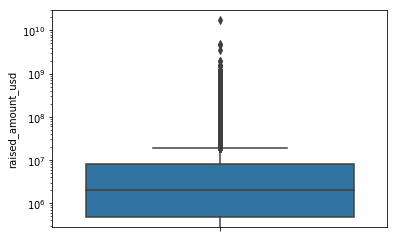

In [449]:
#checking the distribution for funding_amount_usd
sns.boxplot(y=df['raised_amount_usd'])
plt.yscale('log')# data was showing too scattered.
plt.show()

In [450]:
#measures of central tendency
df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

There is significant difference between mean & media, it seems that data is very widely spread.

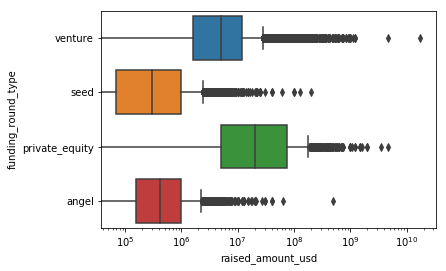

In [451]:
# comparision of the categories
sns.boxplot(x='raised_amount_usd',y='funding_round_type', data=df)
plt.xscale('log')
plt.show()

In [452]:
#Calculating Mean for the funding
round(df.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False))

funding_round_type
private_equity    73938486.0
venture           11724223.0
angel               971574.0
seed                747794.0
Name: raised_amount_usd, dtype: float64

In [453]:
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

Since data is very wide spread, Median would give us a better picture of centeral tendency, hence checked both, Considering the investment of about 5M to 15M to be done, **VENTURE**, would be the most preferable option.

# Checkpoint 3: Country Analysis

Checking the total investment across countries for funding type 'venture'

In [454]:
# filter the df for venture type investments, so all the calculations for now on will be done on the same.
df = df[df.funding_round_type=="venture"]

# group by country codes and compare the total funding amounts
country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(country_wise_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
NLD    2.903876e+09
CHE    2.801560e+09
SGP    2.793918e+09
ESP    1.827622e+09
BRA    1.785818e+09
IRL    1.669286e+09
RUS    1.570426e+09
AUS    1.319029e+09
DNK    1.228311e+09
FIN    1.043200e+09
BEL    1.030840e+09
NOR    9.536361e+08
KOR    8.919883e+08
MYS    8.830588e+08
HKG    7.812670e+08
TWN    6.239795e+08
AUT    5.833607e+08
TUR    5.590975e+08
ITA    4.882894e+08
NZL    4.483164e+08
           ...     
KWT    1.400000e+07
LIE    1.309172e+07
MNE    1.220000e+07
SVN    1.201751e+07
BGR    1.130000e+07
KAZ    1.100000e+07
GRC    1.074378e+07
BAH    8.900000e+06
TTO    8.500000e+06
SVK    8.241062e+06
BGD    7.002000e+06
LBN    6.455000e+06
GGY    3.960000e+06
TUN    3.920000e+06
SEN    2.860000e+06
HRV    2.633669e+06
UGA    2.500000e+06
PER    2.469270e+06
BWA    

In [455]:
#Getting the top 9
top_9_countries = country_wise_total[:9]
top_9_countries

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Amoung the top 9, China is not a english speaking country,so dropping China, we have USA, GBR & IND as the top 3.

In [456]:
# filtering for the top three countries
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [457]:
df.shape

(38803, 9)

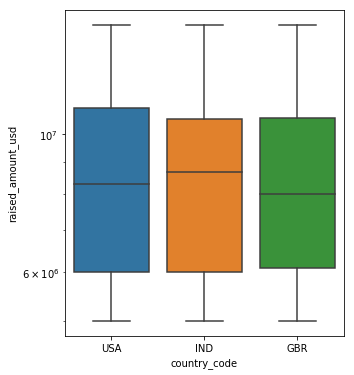

In [493]:
# boxplot to see distributions of funding amount across countries

# boxplot to see distributions of funding amount across countries
plt.figure(figsize=(5, 6))
sns.boxplot(x='country_code', y='raised_amount_usd', data=df)
plt.yscale('log')
plt.show()

We have 3 Top English Speaking Countries to invest in that is USA, GBR, IND

# Checkpoint 4: Sector Analysis 

In [459]:
# Considering the main category as first one, & spliting on the '|'
df.loc[:, 'main_category'] = df['category_list'].apply(lambda x: x.split("|")[0])
df.head()

,name,category_list,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,#fame,Media,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,H2O.ai,Analytics,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [460]:
# drop the category_list column
df = df.drop('category_list', axis=1)
df.head()

,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
0,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,H2O.ai,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,H2O.ai,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,H2O.ai,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,1 Mainstream,acquired,USA,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


Now, reading the mapping file to merge the categories

In [461]:
# read mapping file
mapping = pd.read_csv("mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Missing Values Treatment in mapping file

In [462]:
# missing values in mapping file
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [463]:
# remove the row with 1 missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [464]:
# converting everything to lower case in both the files to ease merging.
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [465]:
# values in main_category column in df which are not in the category_list column in mapping file to ease merging
df[~df['main_category'].isin(mapping['category_list'])]

,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,H2O.ai,operating,USA,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,H2O.ai,operating,USA,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,H2O.ai,operating,USA,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,100Plus,acquired,USA,/organization/100plus,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,1World Online,operating,USA,/organization/1world-online,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,1World Online,operating,USA,/organization/1world-online,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,1World Online,operating,USA,/organization/1world-online,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,24/7 Card,closed,USA,/organization/24-7-card,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,6th Wave Innovations Corporation,operating,USA,/organization/6th-wave-innovations-corporation,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,7 Billion People,closed,USA,/organization/7-billion-people,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


In [466]:
# checking values in category_list column which are not in main_category column to ease mergeing
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


In [467]:
print(mapping['category_list'])

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                    alter0tive medicine
21                                 alumni
22                               a0lytics
23                                android
24                                

This is intresting, I see '0' in between management, alter0tive, veteri0ry it seems somehow 'na' is being replaced to '0', so correcting this behaviour.

In [468]:
#replace 0 with 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0', 'na'))

In [469]:
#merging the 2 dataframes
df = pd.merge(df, mapping, how='inner', left_on='main_category', right_on='category_list')
df.head()

,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,90min,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,90min,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,90min,operating,GBR,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,All Def Digital,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [470]:
#dropping category_list as it appears twice.
df = df.drop('category_list', axis=1)
df.head()

,name,status,country_code,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,#fame,operating,IND,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,90min,operating,GBR,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,90min,operating,GBR,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,90min,operating,GBR,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,All Def Digital,operating,USA,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [471]:
df.shape

(38788, 18)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
name                                       38788 non-null object
status                                     38788 non-null object
country_code                               38788 non-null object
company_permalink                          38788 non-null object
funding_round_permalink                    38788 non-null object
funding_round_type                         38788 non-null object
funded_at                                  38788 non-null object
raised_amount_usd                          38788 non-null float64
main_category                              38788 non-null object
Automotive & Sports                        38788 non-null int64
Blanks                                     38788 non-null int64
Cleantech / Semiconductors                 38788 non-null int64
Entertainment                              38788 non-null int64
Health                                     38788 

Now the categories, would be very difficult to analyse this ways, so got an idea for using the melf function to convert the wide format into the long format

In [473]:
# storing the coloums into different series.

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)

In [474]:
# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,company_permalink,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,raised_amount_usd,status,variable,value
0,/organization/-fame,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,10000000.0,operating,Automotive & Sports,0
1,/organization/90min,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,15000000.0,operating,Automotive & Sports,0
2,/organization/90min,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,5800000.0,operating,Automotive & Sports,0
3,/organization/90min,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,18000000.0,operating,Automotive & Sports,0
4,/organization/all-def-digital,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,5000000.0,operating,Automotive & Sports,0


In [475]:
# dropping having value=0
long_df = long_df[long_df['value']==1]
long_df = long_df.drop('value', axis=1)

In [476]:
# look at the new df
long_df.head()


,company_permalink,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,raised_amount_usd,status,variable
25828,/organization/3d-robotics,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,5000000.0,operating,Automotive & Sports
25829,/organization/3d-robotics,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,14000000.0,operating,Automotive & Sports
25830,/organization/3d-robotics,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,30000000.0,operating,Automotive & Sports
25831,/organization/3d-robotics,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,drones,3D Robotics,50000000.0,operating,Automotive & Sports
25832,/organization/cape-productions,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,10000000.0,operating,Automotive & Sports


In [477]:
# renaming the 'variable' column
long_df = long_df.rename(columns={'variable': 'sector'})

In [478]:
# summarising the sector-wise number and sum of venture investments across three countries

# let's also filter for investment range between 5 and 15m
df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]


In [479]:
# groupby country, sector and compute the count and sum
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

Ploting the same to get a better understanding

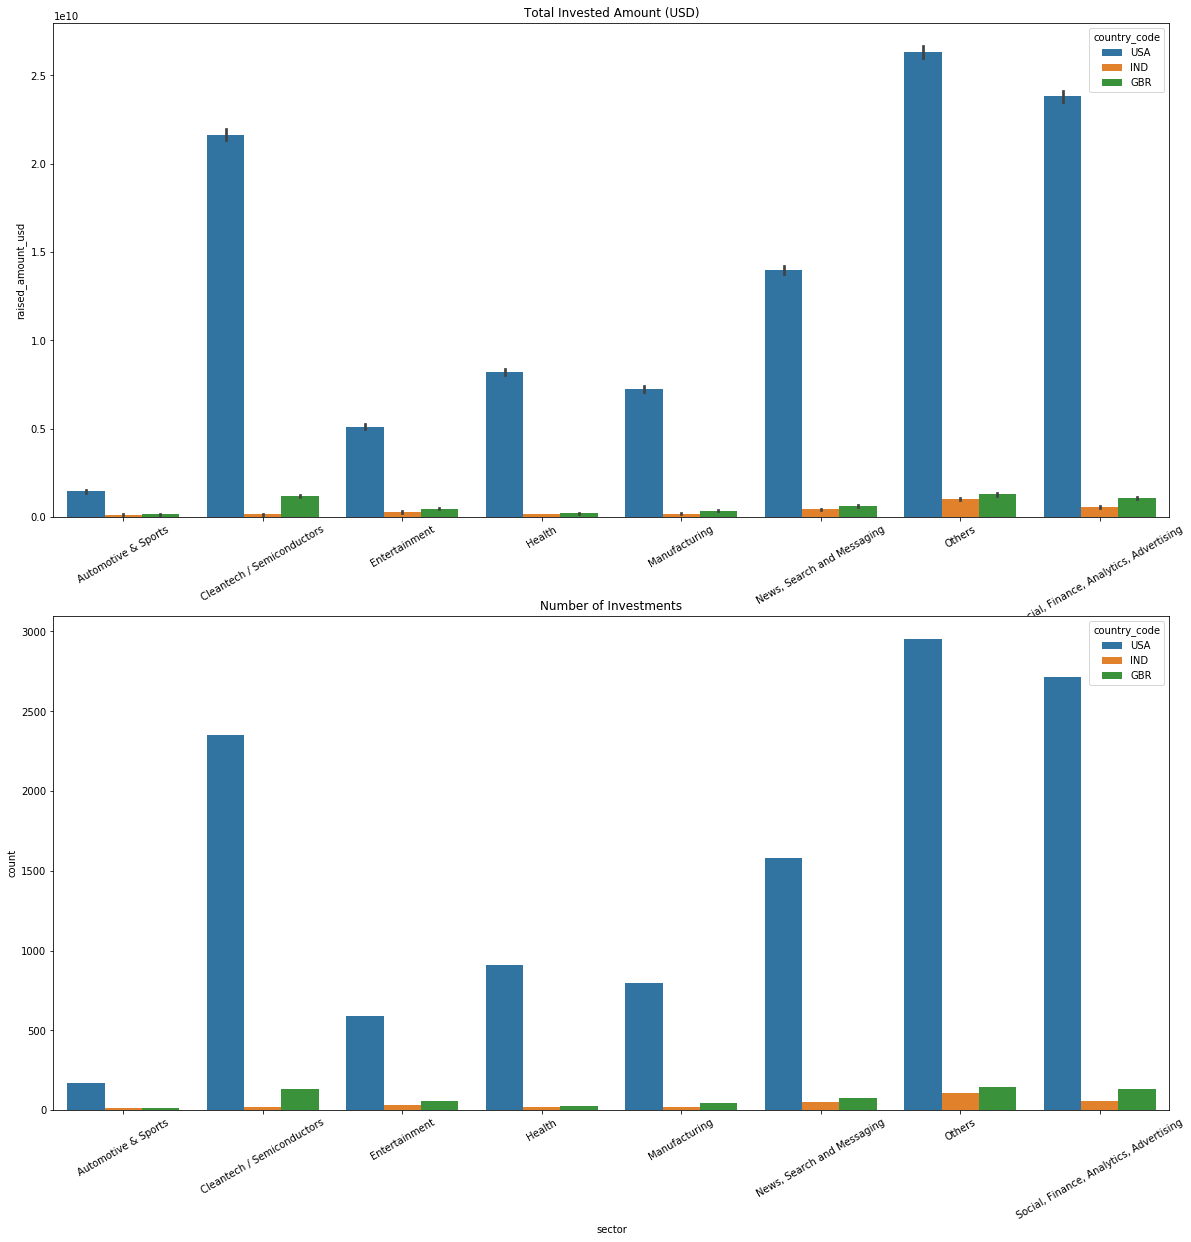

In [480]:
# plotting sector-wise count and sum of investments in the three countries
plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

In [345]:
df.head()

,company_permalink,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,raised_amount_usd,status,sector
25828,/organization/3d-robotics,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,5000000.0,operating,Automotive & Sports
25829,/organization/3d-robotics,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,14000000.0,operating,Automotive & Sports
25832,/organization/cape-productions,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,10000000.0,operating,Automotive & Sports
25833,/organization/dronedeploy,USA,31-03-2015,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,drones,DroneDeploy,9000000.0,operating,Automotive & Sports
25836,/organization/ehang,USA,30-12-2014,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,drones,Ehang,10000000.0,operating,Automotive & Sports


In [377]:
#safe copying the final file
df.to_csv('final.csv', sep = ',', index = False)